# 데이터 불러오기
 - + 한글 폰트 깨짐 방지

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')



# 일별 대여데이터 시각화

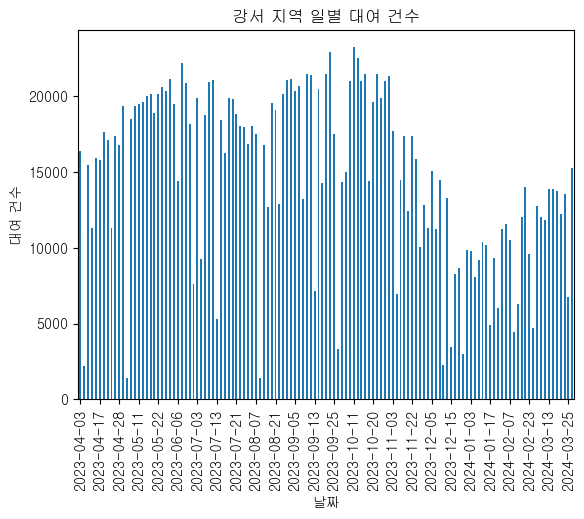

In [62]:
일별_데이터 = 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

눈금_간격 = 5  # 예시로 눈금 간격을 5로 설정
눈금_위치 = range(0, len(일별_데이터.index), 눈금_간격)
눈금_레이블 = 일별_데이터.index[::눈금_간격]

# 시작 대여소별 대여 건수 시각화
일별_데이터.plot(kind='bar')
plt.title('강서 지역 일별 대여 건수')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.xticks(눈금_위치, 눈금_레이블, rotation=90)
plt.show()


# 시간별 데이터 시각화
- 출근 시간 : 06:00~10:00
- 퇴근 시간 : 17:00~21:00

In [63]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00'
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00'
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()


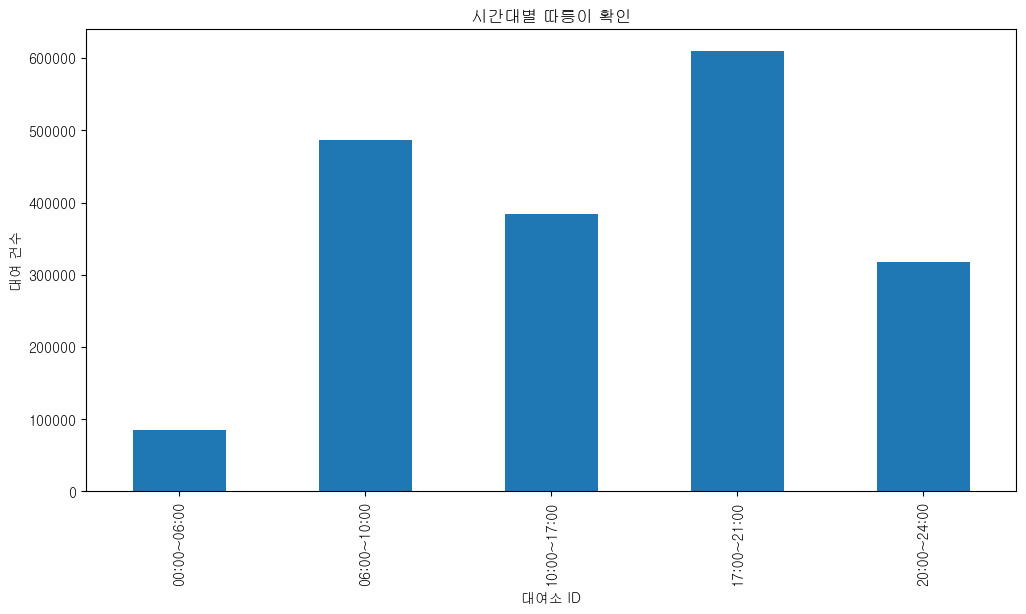

In [64]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

In [65]:
# 시작 대여소 ID로 묶은 후 시간대별 건수 계산
강서_시작_대여소별_시간대별_대여량 = 강서_데이터.groupby(['시작_대여소_ID', '시간대_구간'])['전체_건수'].sum()

# 종료 대여소 ID로 묶은 후 시간대별 건수 계산
강서_종료_대여소별_시간대별_반납량 = 강서_데이터.groupby(['종료_대여소_ID', '시간대_구간'])['전체_건수'].sum()

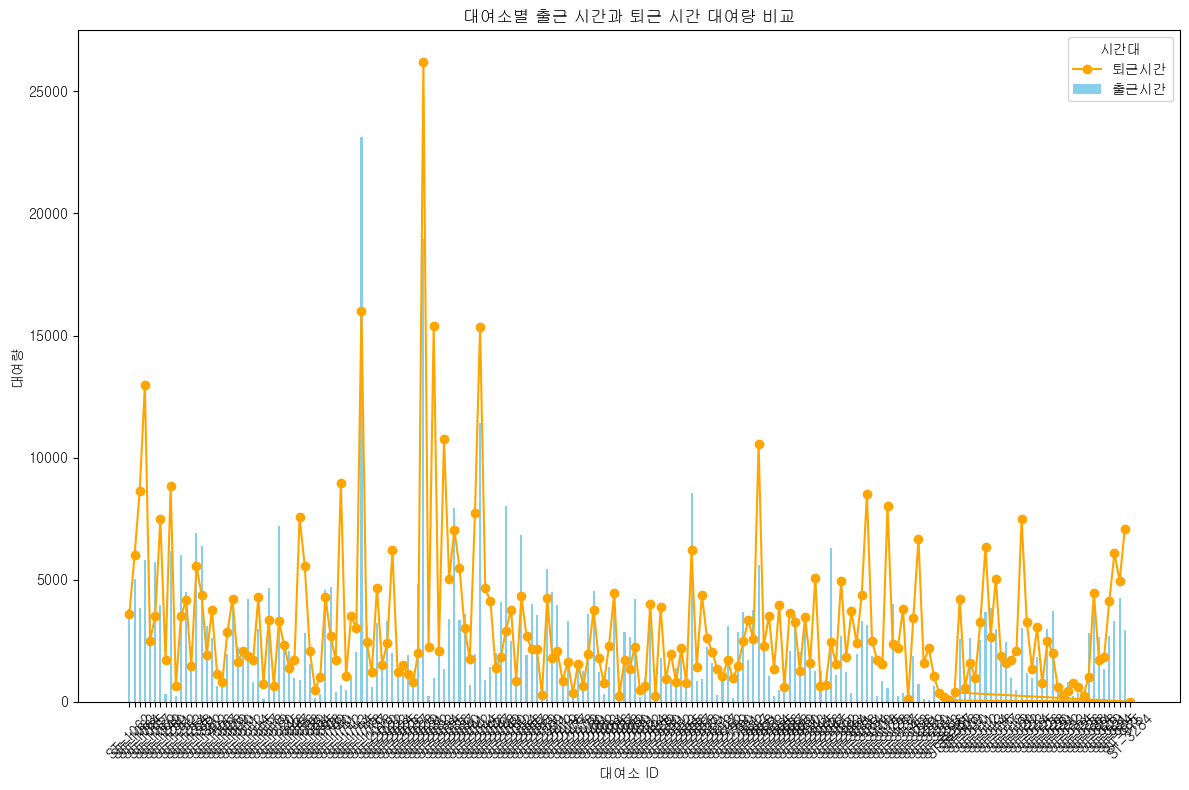

In [66]:
import matplotlib.pyplot as plt

# 출근 시간(06:00~10:00)에 해당하는 데이터 추출
출근시간_대여량 = 강서_시작_대여소별_시간대별_대여량.xs('06:00~10:00', level='시간대_구간')

# 퇴근 시간(17:00~21:00)에 해당하는 데이터 추출
퇴근시간_대여량 = 강서_시작_대여소별_시간대별_대여량.xs('17:00~21:00', level='시간대_구간')

# 출퇴근시간 대여량을 따로 그래프로 시각화
plt.figure(figsize=(12, 8))

# 출근시간은 막대 그래프로
plt.bar(출근시간_대여량.index, 출근시간_대여량.values, width=0.4, label='출근시간', color='skyblue')

# 퇴근시간은 선 그래프로
plt.plot(퇴근시간_대여량.index, 퇴근시간_대여량.values, label='퇴근시간', color='orange', marker='o')

plt.title('대여소별 출근 시간과 퇴근 시간 대여량 비교')
plt.xlabel('대여소 ID')
plt.ylabel('대여량')
plt.xticks(rotation=45)
plt.legend(title='시간대')
plt.tight_layout()
plt.show()

# 한시간 단위 시각화
 - 아직 사용처 안 나옴

In [67]:
def divide_time_range1(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수2 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum()


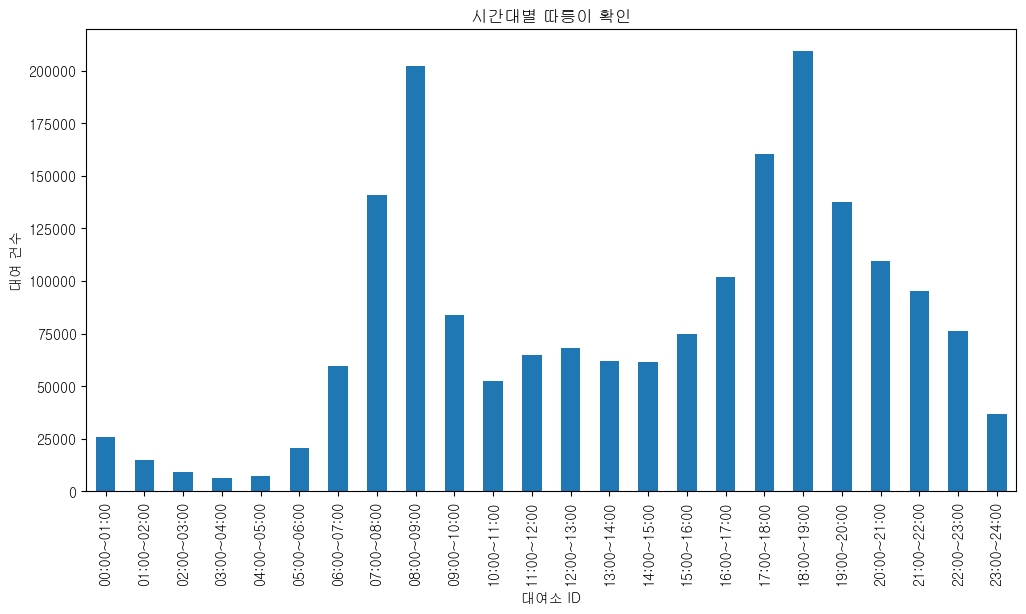

In [68]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수2.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

In [69]:
강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수_시작 = 강서_데이터.groupby(['시작_대여소_ID','한시간_구간'])['전체_건수'].sum()
강서_시간대별_건수_종료 = 강서_데이터.groupby(['종료_대여소_ID','한시간_구간'])['전체_건수'].sum()


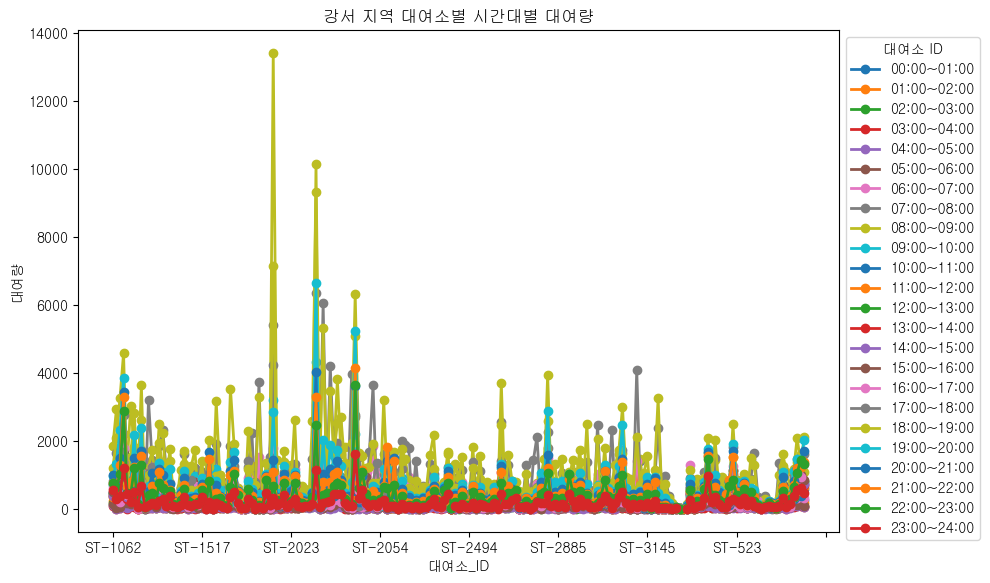

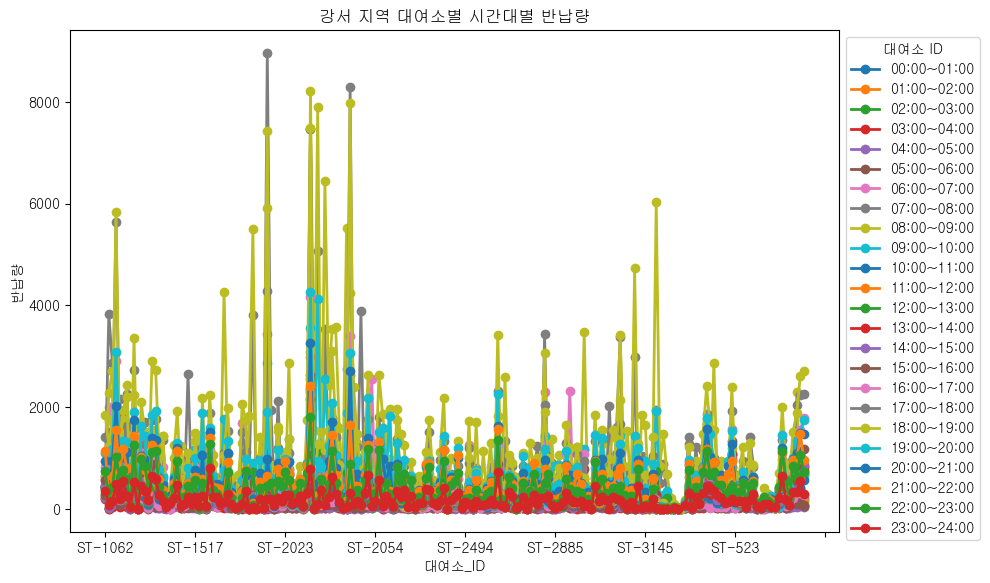

In [70]:
import matplotlib.pyplot as plt

# 시작 대여소 ID로 묶은 후 시간대별 대여량 그래프
강서_시간대별_건수_시작.unstack().plot(kind='line', figsize=(10, 6), linewidth=2, marker='o')
plt.title('강서 지역 대여소별 시간대별 대여량')
plt.xlabel('대여소_ID')
plt.ylabel('대여량')
plt.legend(title='대여소 ID', bbox_to_anchor=(1, 1))
plt.tight_layout()  # 그래프 간격 조정
plt.show()

# 종료 대여소 ID로 묶은 후 시간대별 반납량 그래프
강서_시간대별_건수_종료.unstack().plot(kind='line', figsize=(10, 6), linewidth=2, marker='o')
plt.title('강서 지역 대여소별 시간대별 반납량')
plt.xlabel('대여소_ID')
plt.ylabel('반납량')
plt.legend(title='대여소 ID', bbox_to_anchor=(1, 1))
plt.tight_layout()  # 그래프 간격 조정
plt.show()

# 요일별 비교

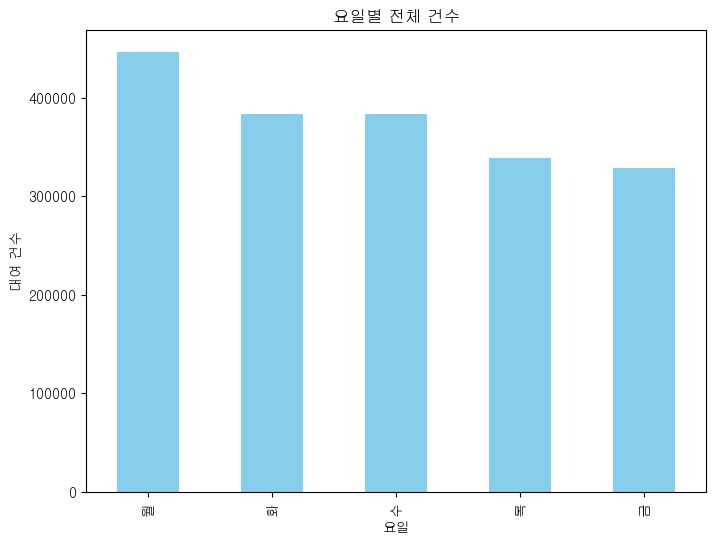

In [71]:

import matplotlib.pyplot as plt
import pandas as pd

# 기준_날짜 열을 날짜 형식으로 변환
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'])

# 기준_날짜 열에서 요일을 추출하여 새로운 열 추가
강서_데이터['요일'] = 강서_데이터['기준_날짜'].dt.day_name()
# 영어 요일명을 한글 요일명으로 변환하는 사전 생성
영어_한글_요일_매핑 = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',

}

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['요일'] = 강서_데이터['요일'].map(영어_한글_요일_매핑)

# 요일별 전체 건수 통계 계산
요일별_통계 = 강서_데이터.groupby('요일')['전체_건수'].sum()


# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
요일별_통계[요일_순서].plot(kind='bar', color='skyblue')
plt.title('요일별 전체 건수')
plt.xlabel('요일')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

In [72]:
시작_요일별_통계 = 강서_데이터.groupby(['시작_대여소_ID', '요일'])['전체_건수'].sum()
종료_요일별_통계 = 강서_데이터.groupby(['종료_대여소_ID', '요일'])['전체_건수'].sum()

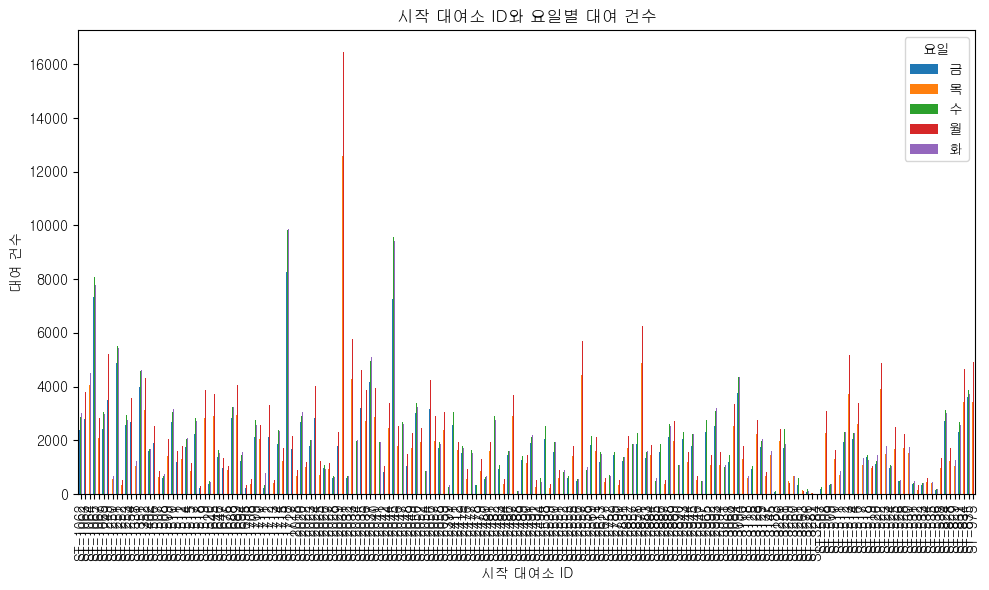

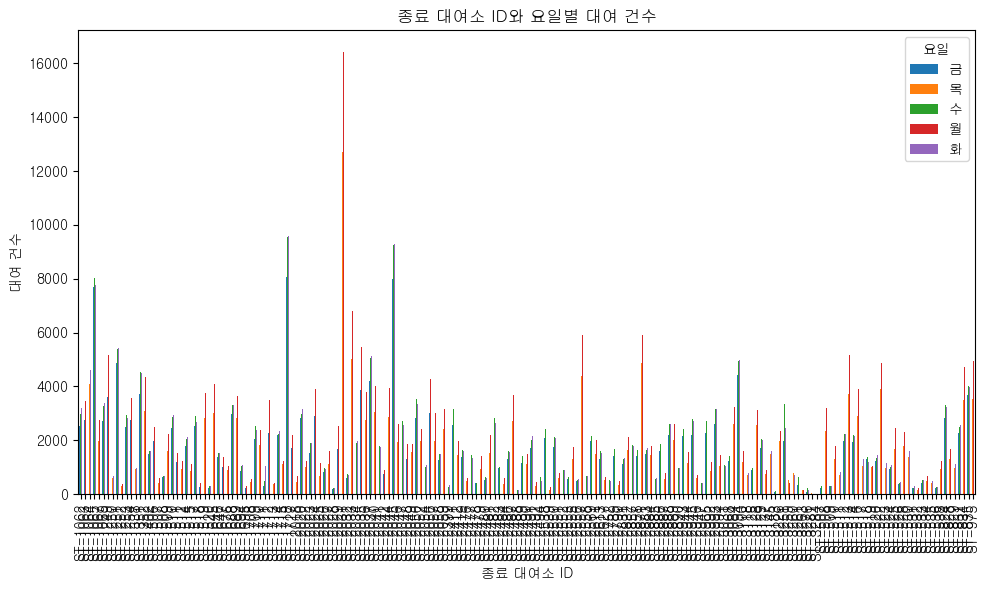

In [73]:
import matplotlib.pyplot as plt

# 시작 대여소 ID와 요일별 대여 건수 시각화
시작_요일별_통계.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('시작 대여소 ID와 요일별 대여 건수')
plt.xlabel('시작 대여소 ID')
plt.ylabel('대여 건수')
plt.legend(title='요일', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# 종료 대여소 ID와 요일별 대여 건수 시각화
종료_요일별_통계.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('종료 대여소 ID와 요일별 대여 건수')
plt.xlabel('종료 대여소 ID')
plt.ylabel('대여 건수')
plt.legend(title='요일', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# 대여소 별 반납, 대여 자료

In [74]:
import matplotlib.pyplot as plt

# 시작 대여소별 전체 횟수 계산
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()



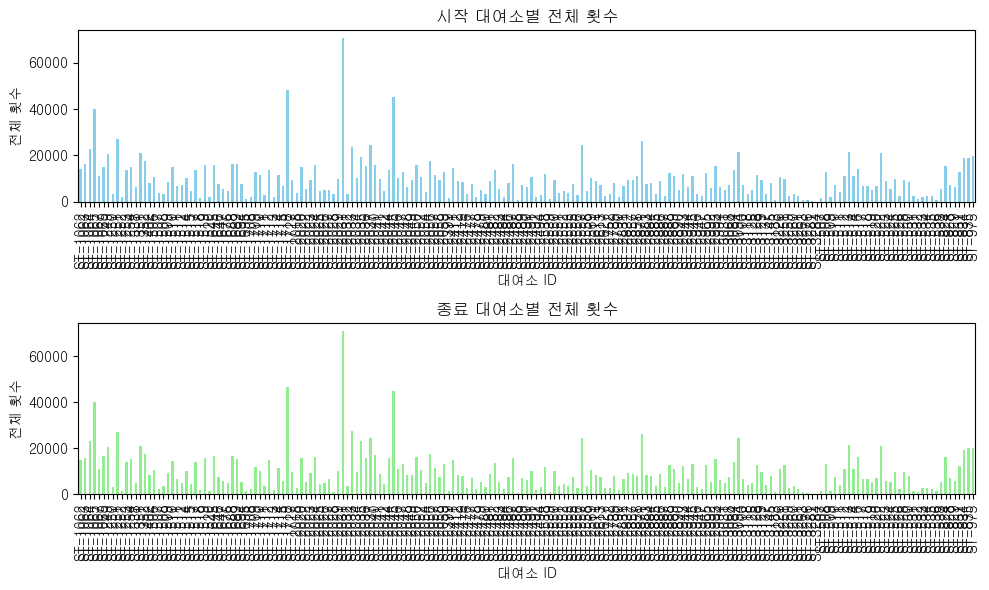

In [75]:

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 시작 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 1)
시작대여소별_전체횟수.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

# 종료 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 2)
종료대여소별_전체횟수.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

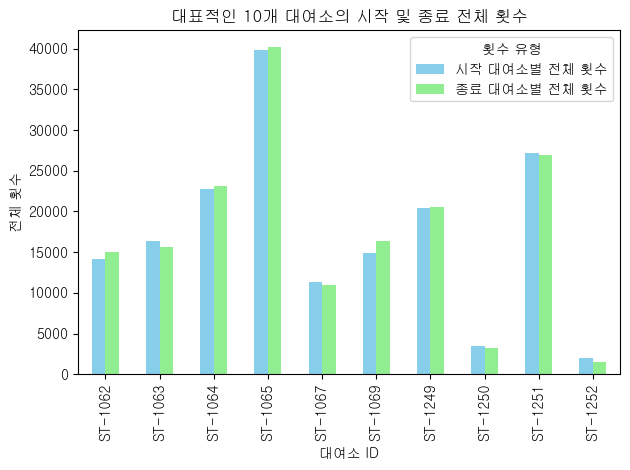

In [76]:
# 시작 대여소별 전체 횟수와 종료 대여소별 전체 횟수를 하나의 데이터프레임으로 병합
merged_data = pd.merge(시작대여소별_전체횟수, 종료대여소별_전체횟수, left_index=True, right_index=True, how='outer')

# 대여소 ID를 인덱스로 설정
merged_data.index.name = '대여소 ID'

# 시작 대여소별과 종료 대여소별 전체 횟수를 가지는 새로운 데이터프레임 생성
merged_data.columns = ['시작 대여소별 전체 횟수', '종료 대여소별 전체 횟수']


# 종료 대여소와 종료 대여소 간의 차이가 큰 상위 10개의 대여소 선택
대여_상위10대여소 = (merged_data['시작 대여소별 전체 횟수'] - merged_data['시작 대여소별 전체 횟수']).nlargest(10).index

# 대표 10개 대여소에 해당하는 데이터 추출
대표10대여소_데이터2 = merged_data.loc[대여_상위10대여소]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 대표 10개 대여소에 대한 시작 및 종료 대여소별 전체 횟수 막대 그래프
대표10대여소_데이터2.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('대표적인 10개 대여소의 시작 및 종료 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)
plt.legend(title='횟수 유형')

plt.tight_layout()
plt.show()

In [77]:
print(merged_data)

         시작 대여소별 전체 횟수  종료 대여소별 전체 횟수
대여소 ID                               
ST-1062          14123          14993
ST-1063          16316          15583
ST-1064          22753          23091
ST-1065          39881          40238
ST-1067          11270          11012
...                ...            ...
ST-829            6274           5608
ST-831           12772          12399
ST-834           18972          19233
ST-835           19074          20177
ST-975           19946          19954

[195 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

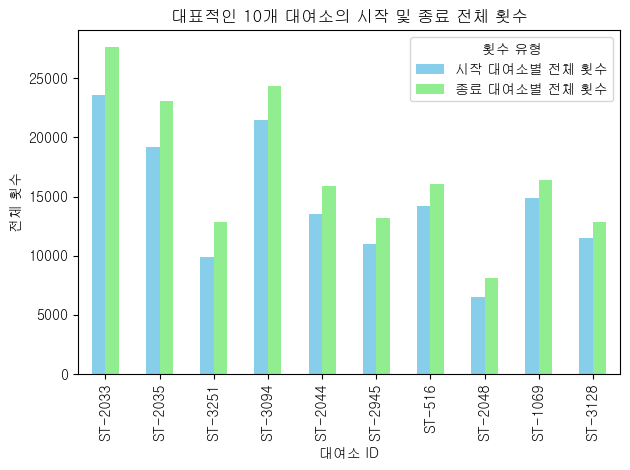

In [78]:

# 종료 대여소와 종료 대여소 간의 차이가 큰 상위 10개의 대여소 선택
반납_상위10대여소 = (merged_data['종료 대여소별 전체 횟수'] - merged_data['시작 대여소별 전체 횟수']).nlargest(10).index

# 대표 10개 대여소에 해당하는 데이터 추출
대표10대여소_데이터2 = merged_data.loc[반납_상위10대여소]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 대표 10개 대여소에 대한 시작 및 종료 대여소별 전체 횟수 막대 그래프
대표10대여소_데이터2.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('대표적인 10개 대여소의 시작 및 종료 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)
plt.legend(title='횟수 유형')

plt.tight_layout()
plt.show()

# 월별 이용량

In [79]:
print(강서_데이터)

             기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  \
0       2023-12-25       0   ST-1718   ST-2047      1        7      1363   
1       2023-12-25       0   ST-2040   ST-1351      1        5       756   
2       2023-12-25       0    ST-528    ST-518      1       14      2086   
3       2023-12-25       0   ST-2031   ST-2965      1        9      1578   
4       2023-12-25       0    ST-829   ST-2054      1       34      2680   
...            ...     ...       ...       ...    ...      ...       ...   
1772057 2024-01-16    2345    ST-525   ST-2481      1        3       600   
1772058 2024-01-16    2345    ST-834    ST-528      1       11      2267   
1772059 2024-01-16    2350   ST-1352   ST-1676      1        6       845   
1772060 2024-01-16    2350   ST-2994    ST-517      1        3       448   
1772061 2024-01-16    2350    ST-513   ST-2482      1        3       710   

              시간대_구간       한시간_구간 요일  
0        00:00~06:00  00:00~01:00  월  
1        